In [1]:
# import the necessary packages
import os
import cv2
import json
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, auc, confusion_matrix, accuracy_score

In [2]:
print("[INFO] packages loaded")
mask_directory = '/content/drive/MyDrive/Colab Notebooks/binary_images_per_class_small'

model_filename = '/content/drive/MyDrive/Colab Notebooks/svm_model.joblib'
confusion_filename='/content/drive/MyDrive/Colab Notebooks/svm_confusion_matrix.png'
results_filename='/content/drive/MyDrive/Colab Notebooks/svm_model.xlsx'
class_report_filename='/content/drive/MyDrive/Colab Notebooks/svm_classification_report.png'
roc_filename='/content/drive/MyDrive/Colab Notebooks/svm_roc_curve.png'
pr_filename='/content/drive/MyDrive/Colab Notebooks/svm_pr_curve.png'

print('[INFO] initialized directories... starting iteration')
# Initialize list to hold data
X = []
y = []

[INFO] packages loaded
[INFO] initialized directories... starting iteration


In [3]:
print('[INFO] initialized directories... starting iteration')

# Iterate through category directories
for category in os.listdir(mask_directory):
    category_path = os.path.join(mask_directory, category)

    # Check if it is a directory
    if os.path.isdir(category_path):
        # Iterate through mask files in the category directory
        for mask_file in os.listdir(category_path):
            if mask_file.endswith('.png'):  # Ensure it's a mask file
                mask_file_path = os.path.join(category_path, mask_file)

                # Read the mask image
                mask_image = cv2.imread(mask_file_path, cv2.IMREAD_GRAYSCALE)
                mask_image = cv2.resize(mask_image, (300, 300))

                # Convert the mask to binary (0s and 1s)
                binary_mask=mask_image // 255

                # Flatten the binary mask to 1D array
                flattened_mask = binary_mask.flatten().astype(int)
                X.append(flattened_mask)
                y.append(category)

X=np.array(X)
y=np.array(y)

print('[INFO] done iteration loop per images. Stored data in arrays. Start on encoding and partitioning')

[INFO] initialized directories... starting iteration
[INFO] done iteration loop per images. Stored data in arrays. Start on encoding and partitioning


In [4]:
print(y)

['chair' 'chair' 'chair' 'chair' 'chair' 'chair' 'chair' 'chair' 'chair'
 'chair' 'chair' 'chair' 'chair' 'chair' 'chair' 'chair' 'chair' 'chair'
 'chair' 'chair' 'chair' 'chair' 'chair' 'chair' 'chair' 'chair' 'chair'
 'chair' 'chair' 'chair' 'chair' 'chair' 'chair' 'chair'
 'computer_keyboard' 'computer_keyboard' 'computer_keyboard'
 'computer_keyboard' 'computer_keyboard' 'computer_keyboard'
 'computer_keyboard' 'computer_keyboard' 'computer_keyboard'
 'computer_keyboard' 'computer_keyboard' 'computer_keyboard'
 'computer_keyboard' 'computer_keyboard' 'computer_keyboard'
 'computer_keyboard' 'computer_keyboard' 'computer_keyboard'
 'computer_keyboard' 'computer_keyboard' 'computer_keyboard'
 'computer_keyboard' 'computer_keyboard' 'computer_keyboard'
 'computer_keyboard' 'computer_keyboard' 'computer_keyboard'
 'computer_keyboard' 'computer_keyboard' 'computer_keyboard'
 'computer_keyboard' 'computer_keyboard' 'computer_keyboard'
 'computer_keyboard' 'computer_keyboard' 'computer_ke

In [8]:
# encode the labels as integers
le = LabelEncoder()
y_encoded = le.fit_transform(y) + 1
(trainX, testX, trainY, testY) = train_test_split(X, y_encoded,
	test_size=0.3, random_state=42)

print('[INFO] encoded and partitioned data. Setting up GridSearchCV with Stratified validation for model training')

param_grid={
    'kernel': ['poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
}

svm = SVC()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(svm, param_grid=param_grid, scoring='accuracy',
                           cv=skf, refit='accuracy', n_jobs=-1)

[INFO] encoded and partitioned data. Setting up GridSearchCV with Stratified validation for model training


In [9]:
print(y_encoded)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 

In [10]:
for i, class_name in enumerate(le.classes_):
    print(f"{class_name} -> {i}")

chair -> 0
computer_keyboard -> 1
computer_mouse -> 2
door -> 3
door_handle -> 4
light_switch -> 5
monitor -> 6
person -> 7
table -> 8


In [ ]:
y_encoded

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,

In [11]:
print('[INFO] done setting up GridSearchCV. starting grid search training')
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model=grid_search.best_estimator_

print('[INFO] done fitting data to model. Doing performance and prediction checks.')

#### FOR PREDICTION CHECK
try:
    y_pred=best_model.predict(testX)
    y_pred_encoded=le.fit_transform(y_pred)
    accuracy = accuracy_score(testY, y_pred_encoded)
    print(f"[RESULTS] Accuracy of Best Model on Given Test Set: {accuracy:.3f}")
except Exception as e:
    print(f"[ERROR] {e}")

[INFO] done setting up GridSearchCV. starting grid search training
[INFO] done fitting data to model. Doing performance and prediction checks.
[RESULTS] Accuracy of Best Model on Given Test Set: 0.000


In [12]:
#### FOR PERFORMANCE CHECK
try:
    print(f"[RESULTS] Best parameters: {best_params}")
    print(f"[RESULTS] Best score: {best_score}")
    cm=confusion_matrix(testY, y_pred_encoded)
    print("[RESULTS] Confustion Matrix on Given Test Set:")
    print(cm)
except Exception as e:
    print(f'[ERROR] failed to print confusion matrix results: {e}')

try:
    print("[RESULTS] Classification Report on Given Test Set:")
    print(classification_report(testY, y_pred_encoded, target_names=le.classes_))
    print(grid_search.cv_results_)
    joblib.dump(best_model, model_filename)
    print('[INFO] model saved')
except Exception as e:
    print(f'[ERROR] failed to print classification report OR save model: {e}')

try:
    cv_results_df = pd.DataFrame(grid_search.cv_results_)
    cv_results_df.to_excel(results_filename, index=False)
    print(f'[INFO] grid search results saved to {results_filename}')
except Exception as e:
    print(f'[ERROR] failed to save grid search results: {e}')

[RESULTS] Best parameters: {'gamma': 'scale', 'kernel': 'poly'}
[RESULTS] Best score: 0.6661060142711518
[RESULTS] Confustion Matrix on Given Test Set:
[[ 0  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  6  0  0  0  0  0]
 [ 0  0  8  0  8  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0]
 [ 0  0  0  0 19  2  0  0  0  0]
 [ 0  0  0  0  6  0 19  0  0  0]
 [ 0  0  0  0  1  0  0 25  0  0]
 [ 0  0  0  0  6  0  0  0 10  0]]
[RESULTS] Classification Report on Given Test Set:
[ERROR] failed to print classification report OR save model: Number of classes, 10, does not match size of target_names, 9. Try specifying the labels parameter
[INFO] grid search results saved to /content/drive/MyDrive/Colab Notebooks/svm_model.xlsx


[INFO] Saved Confusion Matrix on /content/drive/MyDrive/Colab Notebooks/svm_confusion_matrix.png
[ERROR] failed to save ROC curve results: This 'SVC' has no attribute 'predict_proba'
[ERROR] failed to save precision-recall curve results: name 'n_classes' is not defined
[ERROR] failed to save classifcation report results: Number of classes, 10, does not match size of target_names, 9. Try specifying the labels parameter


<Figure size 640x480 with 0 Axes>

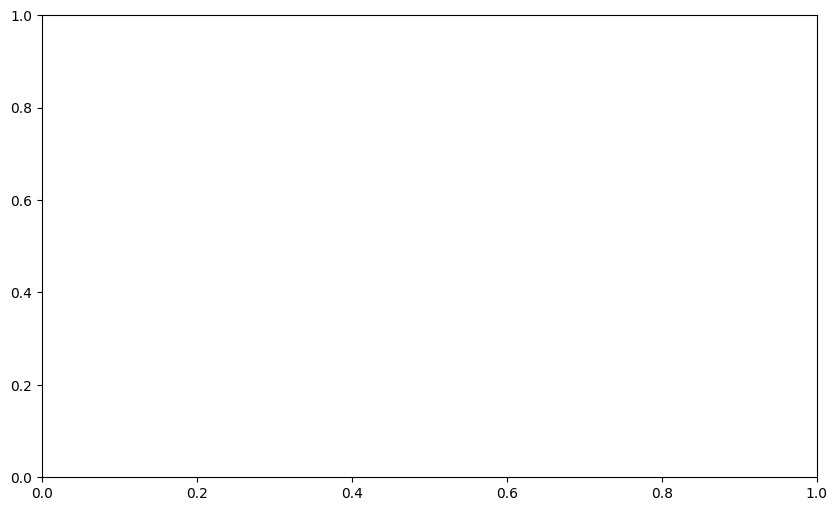

In [13]:
from sklearn.preprocessing import label_binarize
### VISUALIZATION
#Create a Confusion Matrix
try:
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(confusion_filename, bbox_inches='tight')
    plt.close()
    print(f'[INFO] Saved Confusion Matrix on {confusion_filename}')
except Exception as e:
    print(f'[ERROR] failed to save confusion_matrix results: {e}')

# Create a ROC curve
try:
  y_pred_1=best_model.predict_proba(testX)
  y_pred_encoded_1=le.fit_transform(y_pred_1)
  n_classes = len(np.unique(testY))
  testY_binarized = label_binarize(testY, classes=np.unique(testY))
  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(testY_binarized[:, i], y_pred_encoded[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

  # Plot all ROC curves
  plt.figure()
  for i in range(n_classes):
      plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

  plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random chance')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve for Multi-Class')
  plt.legend(loc='best')
  plt.savefig(roc_filename, bbox_inches='tight')
  plt.close()
  print(f'[INFO] Saved ROC Curve on {roc_filename}')
except Exception as e:
  print(f'[ERROR] failed to save ROC curve results: {e}')

# Create a precision-recall curve
try:
  plt.figure()
  for i in range(n_classes):
      precision, recall, _ = precision_recall_curve(testY_binarized[:, i], y_pred_encoded[:, i])
      plt.plot(recall, precision, label='Precision-Recall curve of class {0}'.format(i))

  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve for Multi-Class')
  plt.legend(loc='best')
  plt.savefig(pr_filename, bbox_inches='tight')
  plt.close()
  print(f'[INFO] Saved Precision-Recall Curve on {pr_filename}')
except Exception as e:
  print(f'[ERROR] failed to save precision-recall curve results: {e}')

# Save classification report
try:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.heatmap(pd.DataFrame(classification_report(testY, y_pred_encoded, target_names=le.classes_, output_dict=True)).iloc[:-1, :].T,
                annot=True, cmap='Blues', ax=ax)
    ax.set_title('Classification Report')
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Target Names')
    plt.savefig(class_report_filename, bbox_inches='tight')
    plt.close()
    print(f'[INFO] Saved Classification Report on {class_report_filename}')
except Exception as e:
    print(f'[ERROR] failed to save classifcation report results: {e}')

# Optional: Load the model (demonstration of how to load the saved model)
# model = joblib.load(model_filename)
# print("Model loaded successfully")
# print(classification_report(testY, model.predict(testX), target_names=le.classes_))

In [ ]:
from google.colab import runtime
runtime.unassign()